In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

C:\Users\Baptiste\AppData\Local\Temp\ipykernel_8748\1028975186.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = 'ShanghaiTech_Crowd_Counting_Dataset/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = CSRNet()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Baptiste/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [7]:
model = model.cuda()

In [8]:
checkpoint = torch.load('PartAmodel_best.pth.tar')

In [9]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [24]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i,mae)
print(mae/len(img_paths))

ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data\images\IMG_1.jpg
0 2294.583251953125
12.60760028545673


2154.0518 175.61815


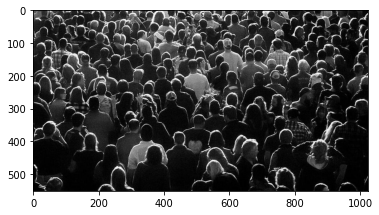

In [31]:
#path = 'C:/Users/Baptiste/Bureau/Baptiste/ARDUINO(a maxime)/Memoire/detr-tensorflow/data/WIDERface/WIDER_train/images/0--Parade/0_Parade_marchingband_1_5.jpg'


i=10
path = img_paths[i]
img = 255.0 * F.to_tensor(Image.open(path).convert('RGB'))

img[0,:,:]=img[0,:,:]-92.8207477031
img[1,:,:]=img[1,:,:]-95.2757037428
img[2,:,:]=img[2,:,:]-104.877445883
img = img.cuda()


gt_file = h5py.File(path.replace('.jpg','.h5').replace('images','ground_truth'),'r')
output = model(img.unsqueeze(0))
print(output.detach().cpu().sum().numpy(), np.sum(np.asarray(gt_file['density'])))
plt.imshow(np.array(Image.open(path).convert('RGB')))

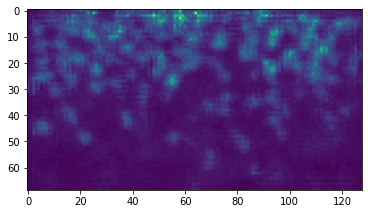

In [32]:
plt.imshow(output.detach().cpu().numpy()[0][0])